In [29]:
%matplotlib inline

import matplotlib
import autograd.numpy as np
import matplotlib.pyplot as plt
import random
import math
from autograd import grad

def generateChevronData():
    xBounds = [-50, 50]
    yBounds = [-50, 50]
    totalPoints = 100
    
    points = []
    targets = []
    
    for i in range(0, totalPoints):
        x = random.randint(xBounds[0], xBounds[1])
        y = random.randint(yBounds[0], yBounds[1])
        
        if x >= y and x <= -y:
            points.append([1, x/50.0,y/50.0])
            targets.append(0)
        else:
            points.append([1, x/50.0,y/50.0])
            targets.append(1)
        
    return np.array(points), np.array(targets)
    
def plotScatter(points):
    xs = [x[1] for x in points]
    ys = [y[2] for y in points]
    
    plt.scatter(xs, ys)

In [30]:
def sigmoid(phi):
    return 1.0/(1.0 + np.exp(-phi))

def MSE(weights):
    predictions = logisticPrediction(weights, points)
    return 1.0/2.0 * np.sum(np.power((targets - predictions), 2))

def logisticPrediction(weights, p):
    return predict(weights, p)
    
def predict(weights, inputs):
    return sigmoid(np.dot(inputs, weights))

In [31]:
def computeGradient(weights, example, target):
    prediction = predict(weights, example)
    dE_dO = computeErrorDifferential(prediction, target)
    
    dO_dZ = prediction * (1-prediction)
    
    dZ_d0 = example[0]
    dZ_d1 = example[1]
    dZ_d2 = example[2]
    
    dE_dZ = dE_dO * dO_dZ
    
    grad = np.zeros(3)#[0.0, 0.0, 0.0]
    grad[0] = dZ_d0 * dE_dZ
    grad[1] = dZ_d1 * dE_dZ
    grad[2] = dZ_d2 * dE_dZ
    
    return grad

def computeErrorDifferential(prediction, target):
    return -(target - prediction)

In [34]:
def trainBoundaryHunter():
    weights = np.array([0.0, 0.0, 0.0])
    
    print("Initial Loss: ", MSE(weights))
    for i in range(0, 50000):
#         g = trainingGradient(weights) * 0.01
        if i % 1000 == 0:
            print()
            print("Loss Before: " + str(MSE(weights)))

        weights = computeStep(weights)
#         weights -= g
    
        if i % 1000 == 0:
            print("Loss After [i = " + str(i) + "]: " + str(MSE(weights)))
            print(weights)
            
    print("Trained Loss: ", MSE(weights))    
    print("Weights: ", weights)
    return weights

def computeStep(weights):
    totalG = np.zeros(3)
    totalE = 0
    for i in range(0, len(points)):
        g = computeGradient(weights, points[i], targets[i])
        totalG += g     
        
#     totalG = totalG * (1/len(points))
    
    weights -= totalG * 0.01
    return weights

Type 0:  35
Type 1:  65
Initial Loss:  12.5

Loss Before: 12.5
Loss After [i = 0]: 12.1601229227
[ 0.0375   0.00395  0.04505]

Loss Before: 4.0327324113
Loss After [i = 1000]: 4.03255300491
[ 1.96195027  1.16639143  4.75820348]

Loss Before: 3.94645855567
Loss After [i = 2000]: 3.94641942338
[ 2.30367262  1.42195545  5.557882  ]

Loss Before: 3.92265656135
Loss After [i = 3000]: 3.92264271993
[ 2.48647718  1.55383724  5.98422667]

Loss Before: 3.91340892145
Loss After [i = 4000]: 3.91340296967
[ 2.60103167  1.63491233  6.25137564]

Loss Before: 3.90922846367
Loss After [i = 5000]: 3.90922562267
[ 2.67822751  1.68891743  6.43147213]

Loss Before: 3.90717137096
Loss After [i = 6000]: 3.90716992584
[ 2.73244227  1.72655771  6.55800519]

Loss Before: 3.90610395777
Loss After [i = 7000]: 3.90610319142
[ 2.7715221   1.75354803  6.64924495]

Loss Before: 3.90553012685
Loss After [i = 8000]: 3.90552970868
[ 2.80018792  1.77327215  6.71618858]

Loss Before: 3.90521396202
Loss After [i = 9000]: 

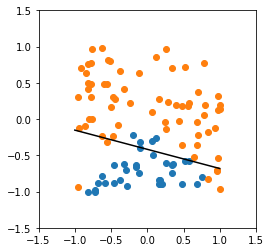

In [35]:
random.seed(1234)
points, targets = generateChevronData()

plt.axis([-1.5, 1.5, -1.5, 1.5])

# Plot points on graph
c1 = []
c2 = []

for i in range(0, len(points)):
    if targets[i] == 0:
        c1.append(points[i])
    else:
        c2.append(points[i])

print("Type 0: ", len(c1))
print("Type 1: ", len(c2))
        
plotScatter(c1)
plotScatter(c2)

weights = trainBoundaryHunter()
byas = -1 * weights[0]/weights[2]
Xcoef = -1 * weights[1]/weights[2]
plt.plot([-1.0, 1.0], [-1*Xcoef + byas, Xcoef + byas], 'k-')
plt.gca().set_aspect('equal')

plt.show()